https://drive.google.com/drive/folders/1B2Z4sKJZf2N0aQfMEvl_n0jnBC6ssd5w?usp=sharing

###Scraping from Youtube and Hotel review

In [ ]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  

In [ ]:
with open('/content/comments.json') as f: 
    d = json.load(f) 

In [ ]:
nycphil = json_normalize(d) 
nycphil.head(3) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,canRate,viewerRating,likeCount,publishedAt,updatedAt,authorChannelId.value
0,3_IEQtzywak,I just had my wedding today and fainted twice ...,I just had my wedding today and fainted twice ...,Sarah Renee,https://yt3.ggpht.com/a/AATXAJz63pxBExQ_ky4cLV...,http://www.youtube.com/channel/UCNHgaA7GKt7k4x...,True,none,0,2020-07-26T05:28:54Z,2020-07-26T05:28:54Z,UCNHgaA7GKt7k4xMo6NivRUQ
1,3_IEQtzywak,Those damn speech are way too long.,Those damn speech are way too long.,AGENT SMITH,https://yt3.ggpht.com/a/AATXAJxjDG8avpEgMzGcIo...,http://www.youtube.com/channel/UCMZvgtGNKbCUO-...,True,none,1,2020-07-08T07:50:24Z,2020-07-08T07:50:24Z,UCMZvgtGNKbCUO-WflqWMFaA
2,3_IEQtzywak,As a man who's been in a tux that permits only...,As a man who's been in a tux that permits only...,BibleBurner,https://yt3.ggpht.com/a/AATXAJzQGixj1JYvH0xSMt...,http://www.youtube.com/channel/UCneVpe9H-NA2rj...,True,none,0,2020-05-29T17:28:39Z,2020-05-29T17:28:39Z,UCneVpe9H-NA2rjZF18Jz7kQ


In [ ]:
# nycphil.drop(columns=['videoId','text'])
x=nycphil.iloc[:,2]
# nycphil.to_csv('YoutubeComments.csv')

In [ ]:
# len(nycphil)
x=pd.DataFrame(x)

In [ ]:
x.to_csv('Only Comments.csv',index=True)

#STEMMING

In [ ]:
import nltk
# nltk.download('word_tokenize')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = PorterStemmer()

In [ ]:
comments =[]
for sent in list(x['text']):
  words = nltk.word_tokenize(sent)
  pick = [ stemmer.stem(wrd) for wrd in words if wrd not in set(stopwords.words('english')) ]
  comments.append(' '.join(pick))

In [ ]:
comments[:5]

['I wed today faint twice ceremoni call 911 second time I turn grey . So embarrassing..😂😭🤦🏼\u200d♀️',
 'those damn speech way long .',
 "As man 's tux permit bare minimum oxygen brain retain maximum bodi heat , stand still extend period time allow air flow , venu almost alway least 80f ... I get .",
 'when I choir high school got sing disney world epcot , like ten peopl faint 2 hr long show , even kid . If let knee lock , drop ! lol',
 'lay rais feet head . don ’ stand back rejoin ceremoni . what ’ wrong peopl ?']

#LEMMITIZATION

In [ ]:
import nltk
# nltk.download('word_tokenize')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmi = WordNetLemmatizer()

In [ ]:

import pandas as pd
x = pd.read_csv('/content/drive/My Drive/IEEE/Only Comments 31-07-2020.csv',encoding = "ISO-8859-1")
Lcomments =[]
for sent in list(x['text']):
  words = nltk.word_tokenize(sent)
  pick = [ lemmi.lemmatize(wrd) for wrd in words if wrd not in set(stopwords.words('english')) ]
  Lcomments.append(' '.join(pick))

In [ ]:
Lcomments[:2]

['I wedding today fainted twice ceremony called 911 second time I turned grey . So embarrassing..ð ? ? ? ð ? ? \xadð ? ¤¦ð ? \x8f¼â ? \x8dâ ? ? ï¸\x8f',
 'Those damn speech way long .']

#BAG OF WORDS - not recommended for huge dataset

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
lemmi = WordNetLemmatizer()
x= pd.read_csv('/content/drive/My Drive/IEEE/Only Comments 31-07-2020.csv',encoding = "ISO-8859-1")
Lcomments =[]
for sent in list(x['text']):
  words = nltk.word_tokenize(sent.lower())
  pick = [ lemmi.lemmatize(wrd) for wrd in words if wrd not in set(stopwords.words('english')) and wrd.isalpha()== True]
  Lcomments.append(' '.join(pick))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
x = x.drop(columns=['Unnamed: 0'])


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(Lcomments).toarray()

In [ ]:
Lcomments

['wedding today fainted twice ceremony called second time turned grey ð',
 'damn speech way long',
 'man tux permit bare minimum oxygen brain retaining maximum body heat standing still extended period time allowing air flow venue almost always least get',
 'choir high school got sing disney world epcot like ten people fainted hr long show even kidding let knee lock drop lol',
 'lay raise foot head donâ stand back rejoin ceremony whatâ wrong people',
 'jisas craist',
 'look bluddy idiot purple bridesmaid nothing deficient',
 'anyone else thought bride one going faint first clip coz acting really uncomfortable ð',
 'one friend fainted black spot covered vision next thing knew floor mom trying see okay described friend got scared must one scariest thing happen person',
 'ð',
 'fucked lol',
 'groom best men fainting',
 'guy looking one video guy fainting falling face ground one edited video playing simultaneously look like guy spinning endless cycle help',
 'think anxiety black hot thick d

#TF-IDF stands for “Term Frequency — Inverse Document Frequency”

https://www.youtube.com/watch?v=D2V1okCEsiE&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm&index=7

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf = TfidfVectorizer()
Lcomments =[]
for sent in list(x['text']):
  words = nltk.word_tokenize(sent.lower())
  pick = [ lemmi.lemmatize(wrd) for wrd in words if wrd not in set(stopwords.words('english')) and wrd.isalpha()== True]
  
  Lcomments.append(' '.join(pick))
X = idf.fit_transform(Lcomments).toarray()

In [ ]:
X.shape

(2359, 3311)

In [ ]:
IDF = pd.DataFrame(X)

In [ ]:
# IDF.columns=[Lcomments]

In [ ]:
IDF.to_csv('IDF.csv',index=False)

In [ ]:
import pandas as pd

idf = pd.read_csv('/content/drive/My Drive/IEEE/LEMMI IDF 29-07-2020 .csv',index_col=False)

In [ ]:
idf.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,...,F3273,F3274,F3275,F3276,F3277,F3278,F3279,F3280,F3281,F3282,F3283,F3284,F3285,F3286,F3287,F3288,F3289,F3290,F3291,F3292,F3293,F3294,F3295,F3296,F3297,F3298,F3299,F3300,F3301,F3302,F3303,F3304,F3305,F3306,F3307,F3308,F3309,F3310,F3311,SENTIMENT ( Negative = 0 || Positive = 1 )
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.280758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
imp.fit_transform(idf)
idf = idf[idf['SENTIMENT ( Negative = 0 || Positive = 1 )']!=np.nan]
# idf[1:2]
Y=idf.iloc[:,-1]

In [ ]:
X.shape
# Y =Y.reshape((154,1))
# print(Y.shape)

(2359, 3311)

In [ ]:
Y=pd.DataFrame(Y)
Y.fillna(value=1)

,SENTIMENT ( Negative = 0 || Positive = 1 )
0,0
1,0
2,1
3,1
4,0
...,...
362,1
363,1
364,1
365,0


In [ ]:
# print(np.any(np.isnan(idf)))
# print(np.all(np.isfinite(idf)))

True
False


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame) 
    # "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
f = clean_dataset(idf)
f

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,...,F3273,F3274,F3275,F3276,F3277,F3278,F3279,F3280,F3281,F3282,F3283,F3284,F3285,F3286,F3287,F3288,F3289,F3290,F3291,F3292,F3293,F3294,F3295,F3296,F3297,F3298,F3299,F3300,F3301,F3302,F3303,F3304,F3305,F3306,F3307,F3308,F3309,F3310,F3311,SENTIMENT ( Negative = 0 || Positive = 1 )
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.280758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.376657,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
idf = clean_dataset(f)
from  sklearn.naive_bayes import MultinomialNB
import math
from sklearn.model_selection import train_test_split
X= idf.iloc[:,:-1].values
Y = idf.iloc[:,-1].values
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
# from sklearn.preprocessing import StandardScaler
# g = GaussianNB()
g = MultinomialNB()
g.fit(X_train, y_train)
MSE=0
k=0
y_pred = []
for i in X_test:
  y_pred.append(g.predict([i]))
  MSE =MSE + (y_test[k] - y_pred[k])**2
print(math.sqrt(MSE)/Y.shape[0])
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)
print(g.score(X_test,y_test))
# print(len(y_test),len(y_pred))

0.011279469856422272
[[226 121]
 [ 65 296]]
0.7372881355932204
0.7372881355932204


In [ ]:
# input = input()
# for sent in input:
#   words = nltk.word_tokenize(sent.lower())
#   pick = [ lemmi.lemmatize(wrd) for wrd in words if wrd not in set(stopwords.words('english')) and wrd.isalpha()== True]
  
#   Lcomments.append(' '.join(pick))
# X = idf.fit_transform(Lcomments).toarray()

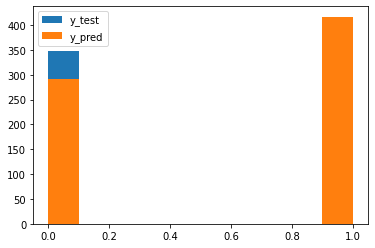

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test,label='y_test')
plt.hist(np.array(y_pred),label='y_pred')
plt.legend()
# print(type(,type(y_test))

In [ ]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.7766323  0.70983213]
recall: [0.65129683 0.8199446 ]
fscore: [0.70846395 0.76092545]
support: [347 361]


In [ ]:
g= []
for i in y_pred:
  g.append(i[0])

In [ ]:
g= list(map(int,g))

In [ ]:
g = np.array(g)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


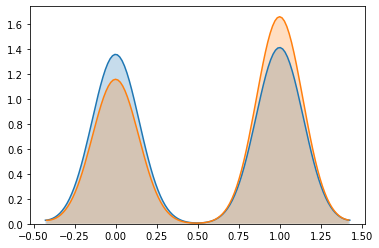

In [ ]:
import seaborn as sns
s = pd.DataFrame(y_pred)
sns.kdeplot(y_test,shade = True)
sns.kdeplot(g,shade=True)

(array([290.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

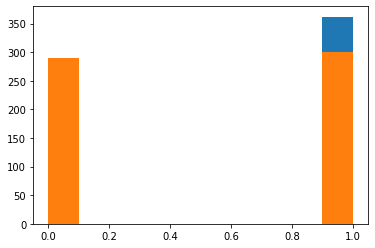

In [ ]:
# sns.scatterplot(y_test,g)
plt.hist(g)
plt.hist(y_test)

#SVM

In [ ]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
import pandas as pd
dat = pd.read_csv('/content/drive/My Drive/IEEE/Stem - IDF.csv')

In [ ]:
dat = clean_dataset(dat)
dat.shape

(2359, 2925)

In [ ]:
dat.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,...,F2886,F2887,F2888,F2889,F2890,F2891,F2892,F2893,F2894,F2895,F2896,F2897,F2898,F2899,F2900,F2901,F2902,F2903,F2904,F2905,F2906,F2907,F2908,F2909,F2910,F2911,F2912,F2913,F2914,F2915,F2916,F2917,F2918,F2919,F2920,F2921,F2922,F2923,F2924,SENTIMENT ( Negative = 0 || Positive = 1 )
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import svm as svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_trian, X_test, y_trian, y_test = train_test_split(dat.iloc[:,:-1].values,dat.iloc[:,-1].values, test_size=0.3,random_state =1)

In [ ]:
# sv = svm.SVC(kernel='rbf')
sv = svm.SVC(kernel='poly')

In [ ]:
sv.fit(X_trian,y_trian)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred=y_pred))

0.7612994350282486


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       348
         1.0       0.75      0.79      0.77       360

    accuracy                           0.76       708
   macro avg       0.76      0.76      0.76       708
weighted avg       0.76      0.76      0.76       708



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred))

[[255  93]
 [ 76 284]]


#Using Stemming to check the score.

In [ ]:
import nltk
# nltk.download('word_tokenize')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
x = pd.read_csv('/content/drive/My Drive/IEEE/Only Comments 31-07-2020.csv',encoding = "ISO-8859-1")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf = TfidfVectorizer()
stemmer = PorterStemmer()
comments =[]
for sent in list(x['text']):
  words = nltk.word_tokenize(sent)
  pick = [ stemmer.stem(wrd) for wrd in words if wrd not in set(stopwords.words('english')) and wrd.isalpha()== True ]
  comments.append(' '.join(pick))
X = idf.fit_transform(comments).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
idf =pd.DataFrame(X)
idf.to_csv('Stem - IDF.csv')
idf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.283841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.385595,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No need to download the Stem - IDF.csv

In [ ]:
idf = pd.read_csv('/content/drive/My Drive/IEEE/Stem - IDF.csv')
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
idf = clean_dataset(idf)
from  sklearn.naive_bayes import MultinomialNB
import math
from sklearn.model_selection import train_test_split
X= idf.iloc[:,:-1].values
Y = idf.iloc[:,-1].values
# Y=Y.astype('int')
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
# from sklearn.preprocessing import StandardScaler
# g = GaussianNB()
g = MultinomialNB()
g.fit(X_train, y_train)
MSE=0
k=0
y_pred = []
for i in X_test:
  y_pred.append(g.predict([i]))
  MSE =MSE + (y_test[k] - y_pred[k])**2
print(math.sqrt(MSE)/Y.shape[0])
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)
print(g.score(X_test,y_test))
# print(len(y_test),len(y_pred))

0.0
[[ 52  57]
 [ 24 132]]
0.6943396226415094
0.6943396226415094


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.48      0.56       109
         1.0       0.70      0.85      0.77       156

    accuracy                           0.69       265
   macro avg       0.69      0.66      0.66       265
weighted avg       0.69      0.69      0.68       265



In [ ]:
# print(Y)

In [ ]:
cm

array([[ 52,  57],
       [ 24, 132]])

#Using Deep Learning Keras

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/IEEE/Only Comments 31-07-2020.csv',encoding = "ISO-8859-1")

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [ ]:
vocab_size = 2000
embedding_dim = 20
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [ ]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1000, 20)          40000     
_________________________________________________________________
flatten_6 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 120006    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 160,013
Trainable params: 160,013
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
59/59 [==============================] - 0s 7ms/step - loss: 0.7061 - accuracy: 0.5093 - val_loss: 0.7100 - val_accuracy: 0.4301
Epoch 2/10
59/59 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5326 - val_loss: 0.7036 - val_accuracy: 0.4301
Epoch 3/10
59/59 [==============================] - 0s 6ms/step - loss: 0.6434 - accuracy: 0.6730 - val_loss: 0.6381 - val_accuracy: 0.6801
Epoch 4/10
59/59 [==============================] - 0s 5ms/step - loss: 0.5210 - accuracy: 0.8479 - val_loss: 0.5372 - val_accuracy: 0.7818
Epoch 5/10
59/59 [==============================] - 0s 5ms/step - loss: 0.3777 - accuracy: 0.8983 - val_loss: 0.5449 - val_accuracy: 0.6801
Epoch 6/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2688 - accuracy: 0.9364 - val_loss: 0.4643 - val_accuracy: 0.7881
Epoch 7/10
59/59 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.9618 - val_loss: 0.4305 - val_accuracy: 0.8136
Epoch 8/10
59/59 [==

In [ ]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head',
                'Not good',
                'she is good',
                'bitch was good',
                'i hate to love it',
                'friend in need is a friend in deed']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head', 'Not good', 'she is good', 'bitch was good', 'i hate to love it', 'friend in need is a friend in deed']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.989332]


I hate spaghetti
[0.16714859]


Everything was cold
[0.36289674]


Everything was hot exactly as I wanted
[0.90422606]


Everything was green
[0.49337742]


the host seated us immediately
[0.6446778]


they gave us free chocolate cake
[0.8945617]


not sure about the wilted flowers on the table
[0.13720348]


only works when I stand on tippy toes
[0.969842]


does not work when I stand on my head
[0.00488845]


Not good
[0.3781221]


she is good
[0.83